---

# A look at the shadow of [HD 332231 b](https://ui.adsabs.harvard.edu/abs/2021arXiv211114968K/abstract)
Here we will be using <s>tracit</s> to look at the shadow of HD 332231 b

---

First we link to the path, where <s>tracit</s> is located

In [1]:
import sys
sys.path.append('/home/emil/Desktop/PhD/tracit')

Then we import <s>tracit</s>.
The two run commands are just to setup text rendering in the plots to LaTeX.

In [2]:
import tracit
nproc = 1

#tracit.run_bus(nproc)
tracit.run_exp(nproc)

We want to create two dictionaries:
* `par` in which we specify the values for the parameters, priors, boundaries, etc.
* `dat` in which we give the filenames for our data, and we can also specify the de-trending/noise model

In [3]:
par = tracit.par_struct(n_planets=1,n_phot=0,n_spec=1)
dat = tracit.dat_struct(n_phot=0,n_rvs=0,n_ls=1,n_sl=0)

For the parameter structure we specified that we have 1 planet in the system, 1 photometric system, and 1 spectroscopic system (RVs, shadow, or slope).

For the data we also define the number of photometric systems, while we further specify the type of spectroscopic measurements$-$`n_rvs` for RVs, `n_ls` for the shadow (lineshape), or `n_sl` for the subplanetary velocity (slope).

Here we want to look at the shadow, so we set `n_ls=1`.

Below we set the path to our shadow data, and give the indices (counting from 0) for the out-of-transit timestamps.

We also specify a range in the CCF, where there's no bump. In this case, for instance, the bump of the CCF does not extend out to beyond 12 km/s. It's of course important to ensure that the value you give is also inside your velocity grid. This is used to de-trend and estimate the scatter of the CCF.

In [4]:
dat['LS filename_1'] = 'shadow.hdf5' # filename
dat['idxs_1'] = [39,40,41] # The out-of-transit indices
dat['No_bump_1'] = 12 # No bump in the CCF, i.e., from (vel < - 12 km/s) or (vel > 12 km/s)

We then initialize the data, and the `business` module.

In [5]:
tracit.ini_data(dat)
tracit.run_bus(par,dat,nproc)

Here we import some results from a previous run to make a nice plot.

In [6]:
saved_results = 1 # set to 1 if you want to read in the results instead
if saved_results:
    import pandas as pd
    rdf = pd.read_csv('results_from_old_fit.csv')
    tracit.update_pars(rdf,par,best_fit=False)

If you don't have results from a previous run, you'll have to set them individually as shown below.

In [7]:
par['T0_b']['Value'] = 2458729.6940
par['lam_b']['Value'] = 0.0

Let's take a look at the shadow of HD 332231 b. We do this by calling `plot_shadow`.

/home/emil/Desktop/PhD/tracit/tracit/shady.py:389: RuntimeWarning: divide by zero encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y
/home/emil/Desktop/PhD/tracit/tracit/shady.py:389: RuntimeWarning: invalid value encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y


Using indices [39, 40, 41] as out-of-transit spectra
## Spectroscopic system 1/Spectrograph\ 1 ##:

Reduced chi-squared for the shadow is:
	 5.944
Factor to apply to get a reduced chi-squared around 1.0 is:
	 2.438

Number of data points: 32.0
Number of fitting parameters: 0
#########################


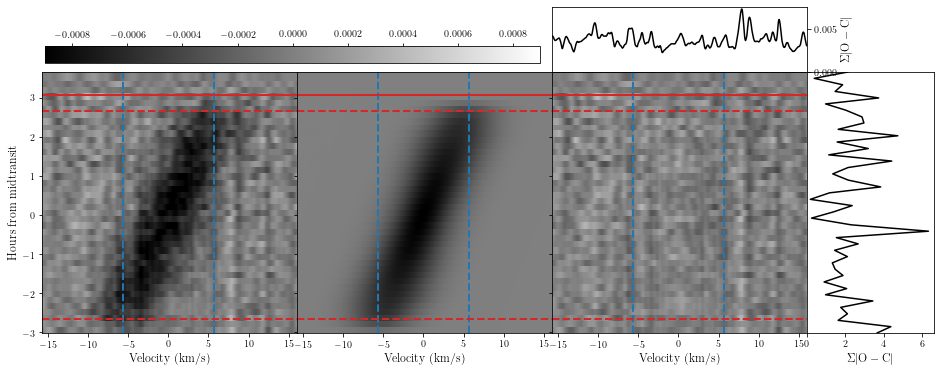

In [8]:
tracit.plot_shadow(par,dat)

We can also look at the out-of-transit CCFs. Here we'll also look at all the in-transit CCFs after subtracting our average out-of-transit CCF, i.e., the 1D shadow.

/home/emil/Desktop/PhD/tracit/tracit/shady.py:389: RuntimeWarning: divide by zero encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y
/home/emil/Desktop/PhD/tracit/tracit/shady.py:389: RuntimeWarning: invalid value encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y


Using indices [39, 40, 41] as out-of-transit spectra
## Spectroscopic system 1/Spectrograph\ 1 ##:

Reduced chi-squared for the oot CCF is:
	 12.089
Factor to apply to get a reduced chi-squared around 1.0 is:
	 3.477

Number of data points: 31
Number of fitting parameters: 0
#########################


/home/emil/Desktop/PhD/tracit/tracit/shady.py:389: RuntimeWarning: divide by zero encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y
/home/emil/Desktop/PhD/tracit/tracit/shady.py:389: RuntimeWarning: invalid value encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y


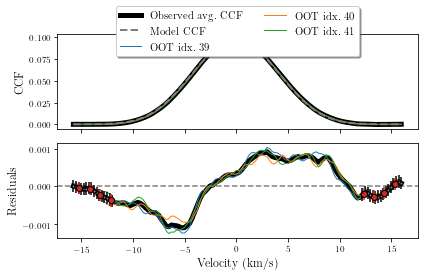

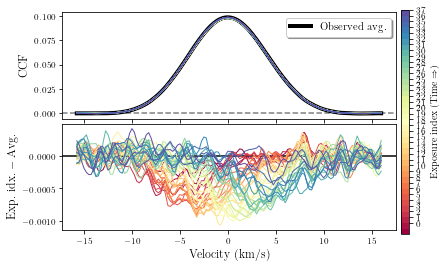

In [9]:
tracit.plot_oot_ccf2(par,dat)

If you want to fit the shadow you can do as shown below.

In [10]:
dat['Fit LS_1'] = 1 # whether to fit the shadow or not
par['lam_b']['Prior'] = 'uni'
par['lam_b']['Prior_vals'] = [90,2,-180,180]
par['FPs'] = ['lam_b']
mc = 0
if mc:
    ndraws = 1500
    nwalkers = 10
    
    ndf = tracit.mcmc(par,dat,ndraws,nwalkers,nproc=1,corner=True,chains=True)

You can also take a look at the slope. For that you also need to set the LC to true (for now at least).

In [11]:
slope = 0
if slope:
    par = tracit.par_struct(n_planets=1,n_phot=1,n_spec=1)
    dat = tracit.dat_struct(n_phot=1,n_rvs=0,n_ls=0,n_sl=1)
    
    dat['LC filename_1'] = 'lc_HD332231.txt'
    
    import pandas as pd
    rdf = pd.read_csv('results_from_old_fit.csv')
    tracit.update_pars(rdf,par,best_fit=False)    

    par['T0_b']['Value'] = 2458729.6940
    par['lam_b']['Value'] = 0.0
    
    dat['SLs'] = 1
    dat['SL filename_1'] = 'shadow.hdf5' # filename
    dat['idxs_1'] = [39,40,41] # The out-of-transit indices
    dat['No_bump_1'] = 12 # No bump in the CCF, i.e., from (vel < - 12 km/s) or (vel > 12 km/s)
    tracit.ini_data(dat)
    tracit.run_bus(par,dat,nproc)
    
    tracit.plot_slope(par,dat)
    